In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("kl.csv", encoding='latin1')
# These columns are links and will not be used in this notebook


In [7]:
data = data.drop(axis = 1, columns=['Photo','Flag', 'Club Logo'])  
data.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,110.5M,565K,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,77M,405K,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,118.5M,290K,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,72M,260K,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,102M,355K,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [11]:
def get_value(value):
    try:
        if isinstance(value, str):
            value = value.replace('€', '')
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'K' in value:
                return float(value.replace('K', '')) * 1_000
            else:
                return float(value)  # in case it's just a raw number like €100
        return 0.0  # for NaN or unexpected types
    except:
        return 0.0


In [13]:
data['Value'] = data['Value'].apply(get_value)
data['Wage'] = data['Wage'].apply(get_value)


In [15]:
print(data[['Value', 'Wage']].describe())


         Value     Wage
count  18207.0  18207.0
mean       0.0      0.0
std        0.0      0.0
min        0.0      0.0
25%        0.0      0.0
50%        0.0      0.0
75%        0.0      0.0
max        0.0      0.0


In [17]:
by_nation = data.Nationality.value_counts()
top_10_nation = by_nation[:10]
top_10_nation

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

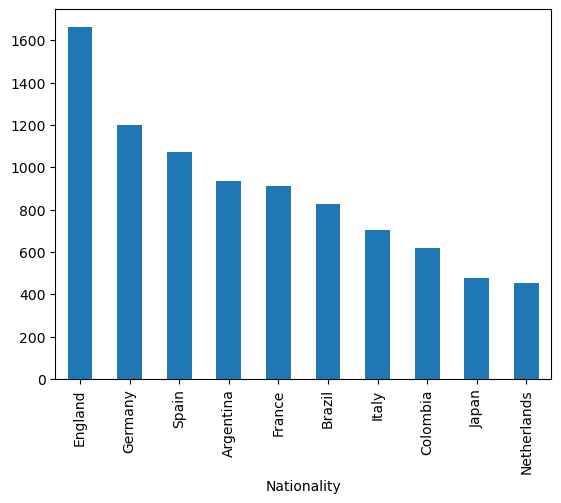

In [19]:
top_10_nation.plot(kind='bar'); # The ';' is to avoid showing a message before the chart

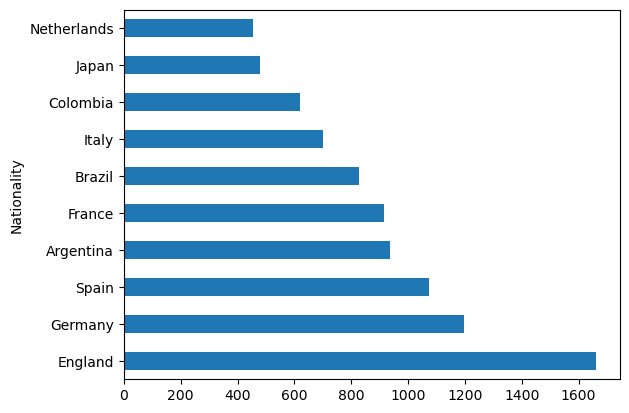

In [21]:
# We can also plot horizontally by using 'barh' in 'kind' argument
top_10_nation.plot(kind='barh');

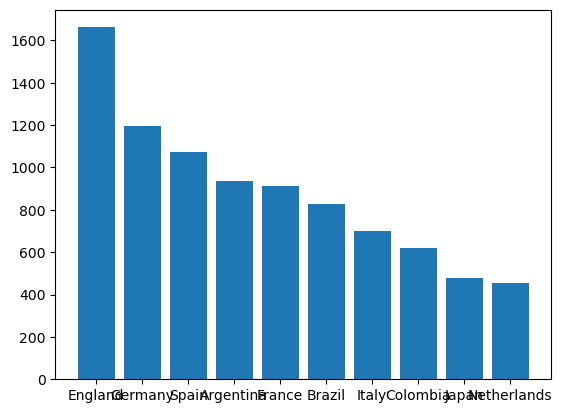

In [23]:
# Method 2: plt.bar() in matplotlib - we input x and y arguments
plt.bar(top_10_nation.index, top_10_nation);

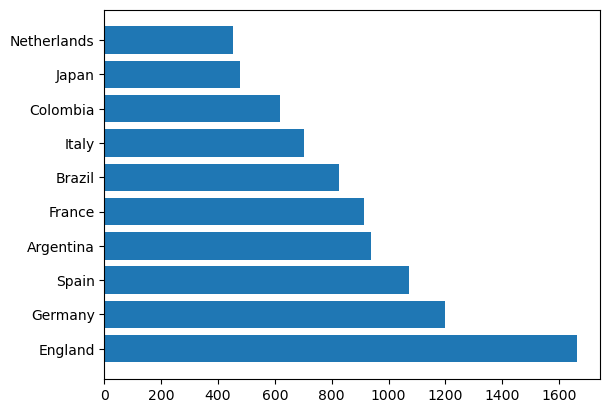

In [25]:
# Horizontally
plt.barh(top_10_nation.index, top_10_nation);

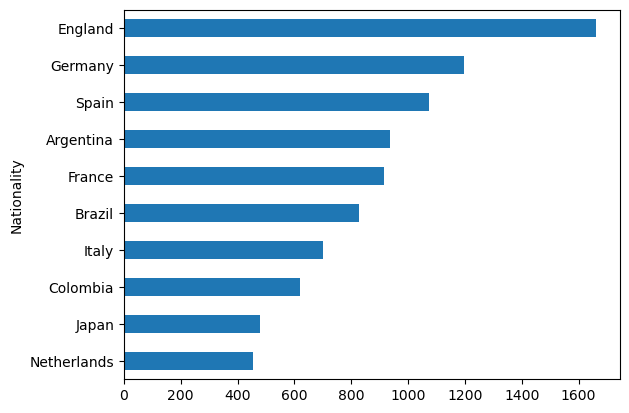

In [28]:
top_10_nation_r = top_10_nation.sort_values(ascending=True)
top_10_nation_r.plot(kind='barh');